<a href="https://colab.research.google.com/github/rajivsresearch/General/blob/master/Price_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.options.display.float_format = '{:,.2f}'.format

2 data frames: Number of Cumulative Units and number of units added

In [0]:
def get_units(x):
  if x == 0:
    arr = pd.DataFrame(data=np.sort(np.random.randint(20,500,36)))
  else:
    arr = pd.DataFrame(data=get_units_stable(x))

  df0 = pd.DataFrame(data=arr.values.reshape((12,3), order='F'), index=np.arange(1,13), columns=[1,2,3])
  df1 = pd.DataFrame(data=(arr - arr.shift()).fillna(arr[0]).values.reshape((12,3),order='F'), index=np.arange(1,13), columns=[1,2,3])
  
  return df0, df1

In [0]:
def get_units_stable(x):
  arr = np.sort(np.random.randint(20,500,x))
  arr2 = np.zeros((36))

  for i in np.arange(0,36):
    arr2[i] = np.random.choice(arr)

  return np.reshape(np.sort(arr2), (12,3), order='F')

Get unit prices for 3 year committment. 3 year unit prices depend on scale. 3 year unit prices are prorated over 36 months, so the unit price for month 2 is price/36*35 and so on.

In [0]:
def get_unitprice_3y(df):
  def get_price(x):
    if x<=150:
      return 1134*3
    elif x<=500:
      return 1080*3
    else:
      return 960*3

  df = df.applymap(lambda x: get_price(x))
  temparr = np.reshape(np.arange(36,0,-1), (12,3), order='F')

  for j in np.arange(1,4):
    for i in np.arange(1,13):
      df.iloc[i-1,j-1] = df.iloc[i-1,j-1]/36*temparr[i-1,j-1]

  return df

Get one year unit prices. Unit prices are prorated to end of the year. 

In [0]:
def get_unitprice_1y():
  df = pd.DataFrame(data=np.reshape(np.arange(36,0,-1), (12,3), order='F'), index=np.arange(1,13), columns=[1,2,3])

  for j in np.arange(1,4):
    for i in np.arange(1,13):
      df.iloc[i-1,j-1] = 1199*3/36*df.iloc[i-1,j-1]

  return df

In [0]:
def simulate_return(x):

  df0, df1 = get_units()
  df2 = get_unitprice_3y(df0)
  df3 = df1 * df2
  df4 = get_unitprice_1y()
  df5 = df4 * df1
  return (df5.sum().sum() - df3.sum().sum()) / df5.sum().sum() * 100, pd.concat([df0, df1, df2, df3, df4, df5], axis=1)

In [0]:
ret, df = simulate_return()

In [0]:
sim = np.zeros((100,1))

for i in np.arange(0,100):
  ret, df = simulate_return()
  sim[i] = ret

(array([ 4., 16., 23., 24., 15., 12.,  2.,  1.,  0.,  3.]),
 array([7.30268459, 7.44177485, 7.5808651 , 7.71995536, 7.85904561,
        7.99813587, 8.13722612, 8.27631637, 8.41540663, 8.55449688,
        8.69358714]),
 <a list of 10 Patch objects>)

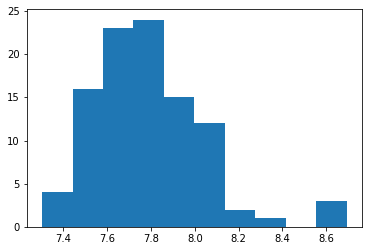

In [0]:
plt.hist(sim)

In [0]:
sim.mean()

7.787931699489831

{'boxes': [<matplotlib.lines.Line2D at 0x7f9c06724550>],
 'caps': [<matplotlib.lines.Line2D at 0x7f9c06724f60>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f9c06731a20>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f9c067316a0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f9c06724860>,
  <matplotlib.lines.Line2D at 0x7f9c06724be0>]}

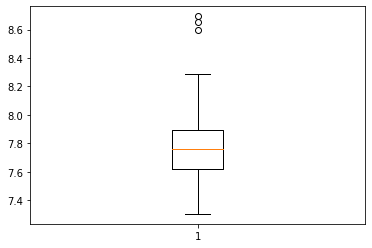

In [0]:
plt.boxplot(sim)